# Practical session 2 - Practise with classic libraries

Students (pair):
- [OUMOUHOU Hicham 1](https://github.com/hichamomh)
- [CHADLI Mohammed Amine 2](https://github.com/MACnCH)

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [2]:
import numpy as np
np.random.seed(0)
a = np.random.rand(5)


In [3]:
np.random.seed(0)
b = np.random.rand(5)
print(a==b)


[ True  True  True  True  True]


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [4]:
np.random.seed(0)
samples = np.random.gamma(shape=9, scale=1/2, size=100000)
np.save('samples.npy',samples)


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

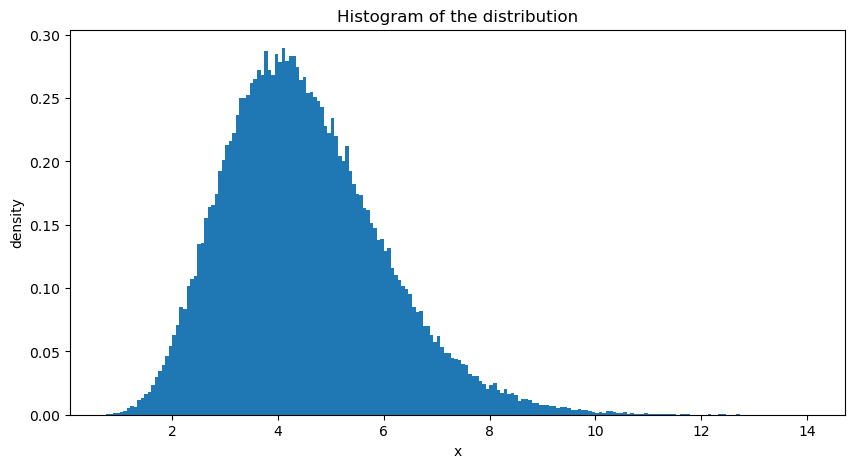

In [5]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.load('samples.npy')
plt.figure(figsize=(10,5))
plt.hist(samples, bins=200, density=True)
plt.title('Histogram of the distribution')
plt.xlabel('x')
plt.ylabel('density')
plt.show()


4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

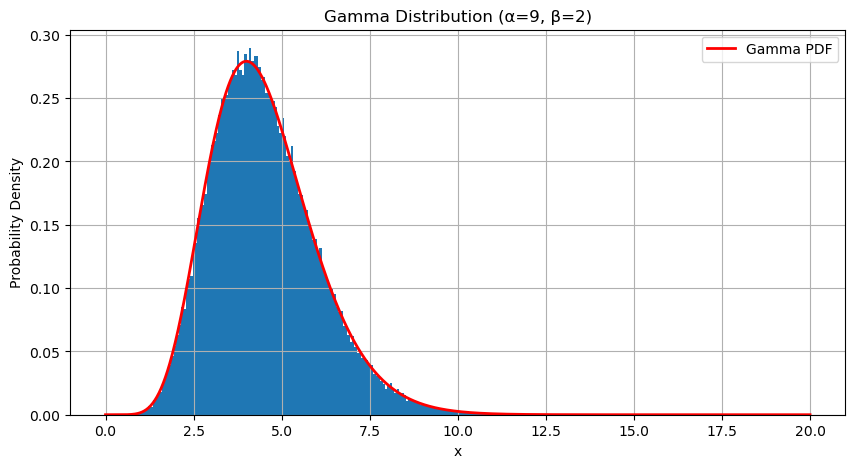

In [6]:
# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
# Plot the probability density function (pdf) for comparison
x = np.linspace(0, 20, 1000)
pdf = (2**9 / np.math.gamma(9)) * x**(9 - 1) * np.exp(-2 * x)
plt.plot(x, pdf, 'r-', lw=2, label='Gamma PDF')
# Add labels and a legend
plt.title(f'Gamma Distribution (α={9}, β={2})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
# Show the plot
plt.savefig('gamma_distribution.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()


---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [7]:
import pandas as pd

df = pd.read_csv("data/data.csv")
display(df)


,X,Y
0,190,24
1,128,28
2,180,24
3,212,19
4,56,37
5,192,22
6,68,34
7,98,25
8,110,36
9,197,24


In [8]:
df.describe()


,X,Y
count,12.00000,12.000000
mean,153.75000,25.916667
std,59.04255,6.515134
min,56.00000,18.000000
25%,107.00000,21.500000
50%,180.50000,24.000000
75%,193.25000,29.500000
max,233.00000,37.000000


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

a = -0.09816474883463194 et b = 41.00949679999132


<Figure size 640x480 with 0 Axes>

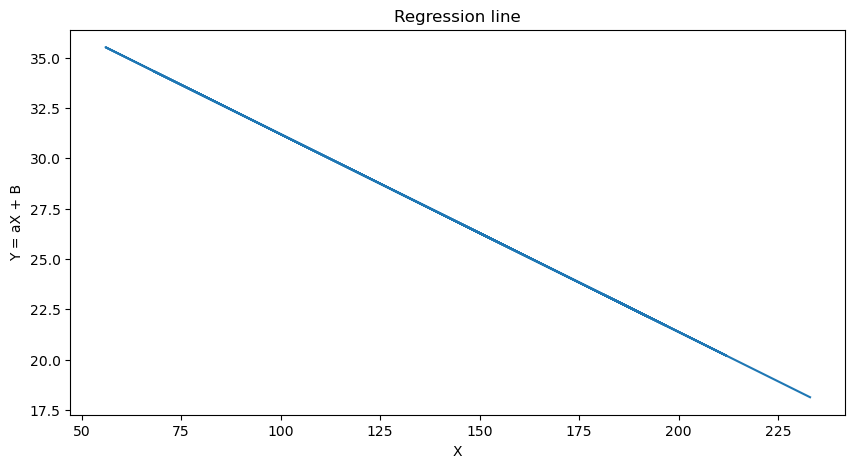

In [9]:
Regression_line = np.polyfit(df["X"],df["Y"],deg=1) #Regression coefficients
X = np.array(df["X"])    #X values as an array
B = Regression_line[1]*np.ones(len(X)) #Y =aX +B
print(f'a = {Regression_line[0]} et b = {Regression_line[1]}')
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(X,Regression_line[0]*X+B)
plt.title("Regression line")
plt.xlabel("X")
plt.ylabel("Y = aX + B")
plt.show()


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

<Figure size 640x480 with 0 Axes>

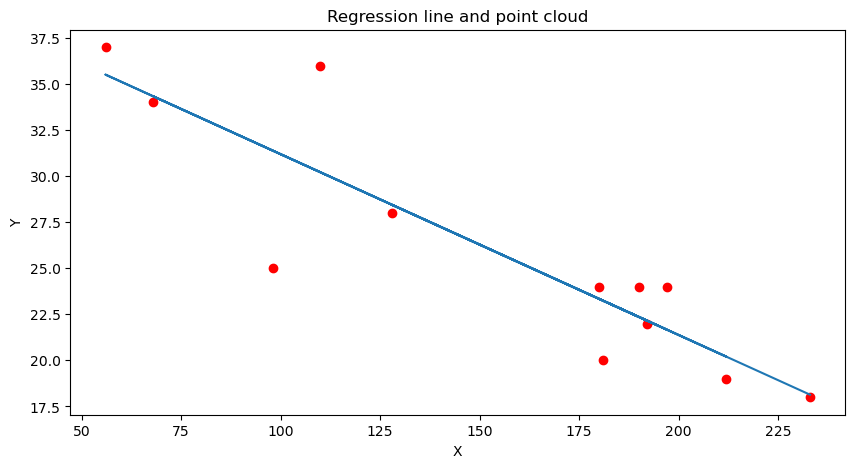

In [10]:
# your code
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(X,Regression_line[0]*X+B,label="Regression line")
plt.scatter(df["X"],df["Y"],label="cloud of points",color="red")
plt.title("Regression line and point cloud")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 



**Answer**:

In [11]:
def gradient2D(X):
    assert X.ndim == 2, 'The input array must be 2D'
    # Compute horizontal differences with a column of zeros appended
    Yh = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]
    # Compute vertical differences with a row of zeros appended
    Yv = np.c_[np.diff(X.T, axis=1), np.zeros((X.shape[1],1))].T
    return Yh, Yv


In [12]:
X = np.array([[1, 2,5], [4, 5,7]])
gradient2D(X)


(array([[1., 3., 0.],
        [1., 2., 0.]]),
 array([[3., 3., 2.],
        [0., 0., 0.]]))

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [195]:
import unittest

class TestGradient2D(unittest.TestCase):

    def test_gradient2D_output_format(self):
        M, N = 2, 2
        X = np.random.rand(M, N)
        Yh, Yv = gradient2D(X)
        self.assertTrue(isinstance(Yh, np.ndarray))
        self.assertTrue(isinstance(Yv, np.ndarray))
        self.assertTrue(Yh.shape == (M, N))
        self.assertTrue(Yv.shape == (M, N))

    def test_gradient2D_constant_matrix(self):
        M, N = 2, 2
        const_val = 42.0
        X_const = np.full((M, N), const_val)
        Yh, Yv = gradient2D(X_const)
        self.assertTrue(np.allclose(Yh, 0.0))
        self.assertTrue(np.allclose(Yv, 0.0))


In [196]:
def run_tests():
    loader = unittest.TestLoader()
    runner = unittest.TextTestRunner()
    suite = loader.loadTestsFromTestCase(TestGradient2D)
    result = runner.run(suite)
    return result

run_tests()


..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [197]:
def gradient2D(X):
    """
    Compute the 2D gradient of an input matrix.

    Parameters:
    X (numpy.ndarray): The input 2D matrix for which the gradient is computed.

    Returns:
    tuple: A tuple containing two numpy.ndarray objects representing the horizontal and vertical gradients.

    The horizontal gradient is computed by taking the difference between adjacent columns of the input matrix X,
    and the vertical gradient is computed by taking the difference between adjacent rows of X. Zeros are appended
    to the last column for the horizontal gradient and to the last row for the vertical gradient.

    Raises:
    AssertionError: If the input matrix X is not 2D.

    Example:
    >>> X = np.array([[1, 2], [4, 5]])
    >>> Yh, Yv = gradient2D(X)
    >>> print(Yh)
    array([[ 1,  0],
           [ 1,  0]])
    >>> print(Yv)
    array([[ 3,  3],
           [0, 0]])
    """
    assert X.ndim == 2, 'The input array must be 2D'
    # Compute horizontal differences with a column of zeros appended
    Yh = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]
    # Compute vertical differences with a row of zeros appended
    Yv = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]
    return Yh, Yv


In [198]:
help(gradient2D)


Help on function gradient2D in module __main__:

gradient2D(X)
    Compute the 2D gradient of an input matrix.
    
    Parameters:
    X (numpy.ndarray): The input 2D matrix for which the gradient is computed.
    
    Returns:
    tuple: A tuple containing two numpy.ndarray objects representing the horizontal and vertical gradients.
    
    The horizontal gradient is computed by taking the difference between adjacent columns of the input matrix X,
    and the vertical gradient is computed by taking the difference between adjacent rows of X. Zeros are appended
    to the last column for the horizontal gradient and to the last row for the vertical gradient.
    
    Raises:
    AssertionError: If the input matrix X is not 2D.
    
    Example:
    >>> X = np.array([[1, 2], [4, 5]])
    >>> Yh, Yv = gradient2D(X)
    >>> print(Yh)
    array([[ 1,  0],
           [ 1,  0]])
    >>> print(Yv)
    array([[ 3,  3],
           [0, 0]])



4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [199]:


def TV(X):
    """
    Compute the squared sum of the total variation of a 2D input matrix.

    Parameters:
    X (numpy.ndarray): The input 2D matrix for which the squared sum of total variation is computed.

    Returns:
    float: The squared sum of the total variation of the input matrix.

    The total variation is computed as the sum of the squared differences between adjacent elements
    in the horizontal and vertical directions of the input matrix.

    Example:
    >>> X = np.array([[1, 2], [4, 5]])
    >>> tv_square_sum = TV_square_sum(X)
    >>> print(tv_square_sum)
    4.47213595499958
    """
    assert X.ndim == 2, 'The input array must be 2D'

    # Calculate the gradients using the gradient2D function
    Yh, Yv = gradient2D(X)

    # Compute the squared sum of total variation
    squared_sum_tv = np.sqrt(np.sum(Yh ** 2) + np.sum(Yv ** 2))

    return squared_sum_tv

# Example usage:
X = np.array([[1, 2], [4, 5]])
tv_square_sum = TV(X)
print(tv_square_sum)


4.47213595499958


In [200]:
class TestTV(unittest.TestCase):

    def test_total_variation(self):
        X = np.array([[1, 2], [4, 5]])
        tv = TV(X)
        self.assertEqual(tv, 4.47213595499958)
        constant_matrix = np.array([[1, 1], [1, 1]])
        tv_constant = TV(constant_matrix)
        self.assertEqual(tv_constant, 0.0)

def run_tests():
    loader = unittest.TestLoader()
    runner = unittest.TextTestRunner()
    suite = loader.loadTestsFromTestCase(TestTV)
    result = runner.run(suite)
    return result

run_tests()


.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [215]:
def gradient2D_adjoint(Yh, Yv):
    """
    Compute the adjoint of the 2D discrete gradient operator D* applied to complex-valued matrices Yh and Yv.

    Parameters:
    Yh (numpy.ndarray): The horizontal gradients matrix of shape (M, N).
    Yv (numpy.ndarray): The vertical gradients matrix of shape (M, N).

    Returns:
    numpy.ndarray: The adjoint operator applied to Yh and Yv, resulting in a complex-valued matrix of shape (M, N).

    The adjoint of the 2D discrete gradient operator D* is computed based on the provided equations.

    """
    assert Yh.shape == Yv.shape, 'Yh and Yv must have the same shape'

    # Compute the adjoint operator D* based on the provided equations
    adjoint_Yh = np.c_[-Yh[:, 0:1], -np.diff(Yh[:,0:-1], axis=1), Yh[:, -2:-1]]
    adjoint_Yv = np.c_[-Yv[0:1, :].T, -np.diff(Yv[0:-1,:].T, axis=1), Yv[-2:-1, :].T].T

    return adjoint_Yh + adjoint_Yv

# Example usage:
Yh = np.array([[1 , 3,4], [5 , 7, 6 ], [9 , 11, 8 ], [13 , 15, 10 ]])
Yv = np.array([[2 , 4 ,1], [6 , 8 ,3], [10 , 12 ,5], [14 , 16 ,7]])


adjoint_result = gradient2D_adjoint(Yh, Yv)
print(adjoint_result)


[[ -3  -6   2]
 [ -9  -6   5]
 [-13  -6   9]
 [ -3  10  20]]


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

> `np.conj` is useful.

**Answer**:

In [219]:
class TestGradient2DAdjoint(unittest.TestCase):

    def test_adjoint_relationship(self):
        np.random.seed(0)
        M, N = 3, 3
        X = np.random.rand(M, N)
        Yh = np.random.rand(M, N)
        Yv = np.random.rand(M, N)
        adjoint_result = gradient2D_adjoint(Yh, Yv)
        expected_shape = (M, N)
        self.assertEqual(adjoint_result.shape, expected_shape)
        RHS = np.trace(np.conj(X.T).dot(adjoint_result))
        LHS = np.trace(np.conj(gradient2D(X)[0].T).dot(Yh)) + np.trace(np.conj(gradient2D(X)[1].T).dot(Yv))
        tolerance = 1e-5
        self.assertAlmostEqual(LHS, RHS, delta=tolerance)
        self.assertTrue(adjoint_result.shape == (M, N))

def run_tests():
    loader = unittest.TestLoader()
    runner = unittest.TextTestRunner()
    suite = loader.loadTestsFromTestCase(TestGradient2DAdjoint)
    result = runner.run(suite)
    return result

run_tests()


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
